In [1]:
def border(aperture):
    together=[]
    for i, eachline in enumerate(aperture):
        for j, each in enumerate(eachline):
            if each==1:
                together.append([[j,j+1],[i,i]])
                together.append([[j,j+1],[i+1,i+1]])
                together.append([[j,j],[i,i+1]])
                together.append([[j+1,j+1],[i,i+1]])
    filtered=[]
    for each in together:
        c=0
        for EACH in together:
            if each==EACH:
                c+=1
        if c==1:
            filtered.append(each)
            
    return filtered

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS
import astropy.units as u
from astropy.coordinates import SkyCoord
from astroquery.gaia import Gaia
from lightkurve import TessTargetPixelFile

Created TAP+ (v1.0.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443


In [7]:
hdul = fits.open("tess2018234152941-s0001-4-4-0120-s_ffic.fits")[0]
wcs = WCS(hdul.header)


sector1ffn='tess-s0001-4-4_83.40630967798376_-62.48977125108528_64x64_astrocut.fits'
tpf_s1 = TessTargetPixelFile(sector1ffn)

In [9]:
coord = SkyCoord(ra=83.40630967798376, dec=-62.48977125108528, unit=(u.degree, u.degree), frame='icrs')
radius = u.Quantity(1.1*32*1.414*21/3600, u.deg)
j = Gaia.cone_search_async(coord, radius)
r = j.get_results()
r.pprint()

Query finished.
         dist          ...
                       ...
---------------------- ...
5.2030643635554925e-06 ...
   0.00327731245051677 ...
  0.009260581924779184 ...
  0.010163180350853781 ...
  0.010232114986970185 ...
  0.010571988517761897 ...
  0.011291259288672972 ...
  0.011409032298542447 ...
  0.011498865367142749 ...
  0.011939990140685754 ...
                   ... ...
    0.2902291779564049 ...
    0.2902449607200544 ...
    0.2902527586203929 ...
   0.29025309481944134 ...
    0.2902618478458813 ...
    0.2902619481335399 ...
     0.290263731695323 ...
   0.29029045137346954 ...
   0.29032678519836996 ...
    0.2903327504180711 ...
Length = 15717 rows


In [10]:
extractedgaiadata=[
r[(r['phot_g_mean_mag'] < 17)]['source_id'],
r[(r['phot_g_mean_mag'] < 17)]['ra'],
r[(r['phot_g_mean_mag'] < 17)]['dec'],
r[(r['phot_g_mean_mag'] < 17)]['phot_g_mean_mag'],
r[(r['phot_g_mean_mag'] < 17)]['phot_rp_mean_mag']]

In [12]:
sizearray=[]
for index, each in enumerate(extractedgaiadata[4]):
    if np.isscalar(each):
        sizearray.append(each)
    else:
        sizearray.append(extractedgaiadata[3][index])
brightness=np.asarray(sizearray)
sizearray=np.asarray(sizearray)

In [13]:
sizearray = 60*(np.max(sizearray)-sizearray)

In [14]:
ourap=np.asarray([
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

ourap = ourap > 0

/home/szabopal/.local/lib/python3.5/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/home/szabopal/.local/lib/python3.5/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


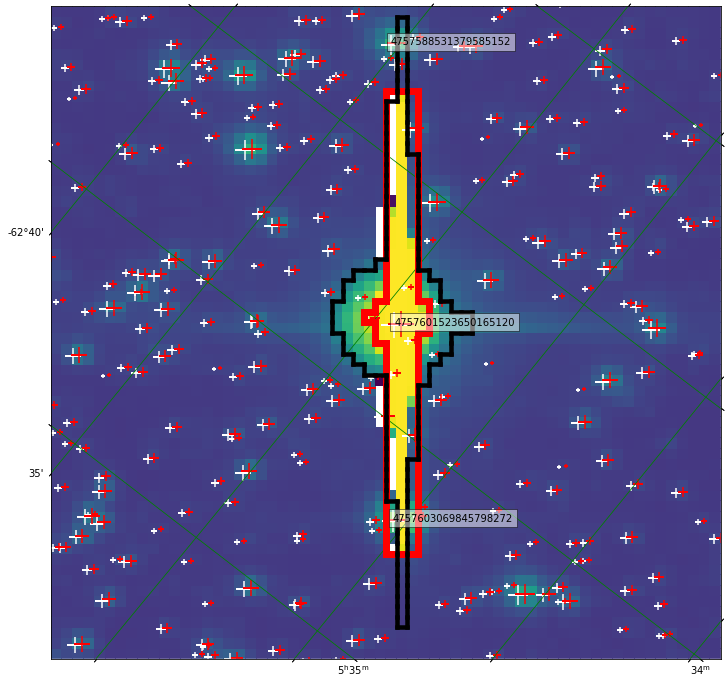

In [79]:
fig = plt.figure(figsize=(12,12))
fig.add_subplot(111, projection=wcs)

#plt.figure(figsize=(12,12))
plt.pcolormesh(np.log(hdul.data))

#filtered=border(tpf_s1.pipeline_mask*1)
#for x in range(len(filtered)):
#    plt.plot(np.asarray(filtered[x][0])+19,np.asarray(filtered[x][1])+1,c='red', linewidth=7)
 

    
    
spocaper=np.genfromtxt('betador_s0001_spocaperture.txt')
spocaper=np.asarray(spocaper)
spocaper=(spocaper == 75)*1
filtered_spoc=border(spocaper)
for x in range(len(filtered_tasoc)):
    plt.plot(np.asarray(filtered_spoc[x][0])+19,np.asarray(filtered_spoc[x][1])+1,c='red', linewidth=7)



customaper=np.genfromtxt('betador_s0001_customaperture.txt')
customaper=np.asarray(customaper)
customaper=(customaper == 3)*1
filtered_custom=border(customaper)
for x in range(len(filtered_custom)):
    plt.plot(np.asarray(filtered_custom[x][0])+19,np.asarray(filtered_custom[x][1])+1,c='black', linewidth=4.5)
        
     
    
#filtered_ourap=border(ourap)
#for x in range(len(filtered_ourap)):
#    plt.plot(np.asarray(filtered_ourap[x][0])+19,np.asarray(filtered_ourap[x][1])+1,c='palegreen', linewidth=3)
    
ax = fig.gca()
for x in range(len(extractedgaiadata[0])):
    ax.scatter(extractedgaiadata[1][x], extractedgaiadata[2][x],transform=ax.get_transform('world'),marker='+',c='white',s=sizearray[x])
#    if brightness[x]<12:
#        ax.text(extractedgaiadata[1][x], extractedgaiadata[2][x],extractedgaiadata[0][x],transform=ax.get_transform('world'),bbox=dict(facecolor='white', alpha=0.5))

#for x in range(len(extractedgaiadata[0])):
#    ax.scatter(extractedgaiadata[1][x]-0.5*21/3600, extractedgaiadata[2][x],transform=ax.get_transform('world'),marker='+',c='white',s=sizearray[x])        

for x in range(len(extractedgaiadata[0])):
    ax.scatter(extractedgaiadata[1][x]-2*0.5*21/3600, extractedgaiadata[2][x]+2*0.2*21/3600,transform=ax.get_transform('world'),marker='+',c='red',s=sizearray[x])        
    if extractedgaiadata[0][x] in [4757603069845798272,4757601523650165120,4757588531379585152]:
        ax.text(extractedgaiadata[1][x], extractedgaiadata[2][x],extractedgaiadata[0][x],transform=ax.get_transform('world'),bbox=dict(facecolor='white', alpha=0.5))

ax.set_xlim([0, 62])
ax.set_ylim([0, 62])
    
ax.coords.grid(True, color='green', ls='solid')

/home/szabopal/.local/lib/python3.5/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/home/szabopal/.local/lib/python3.5/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


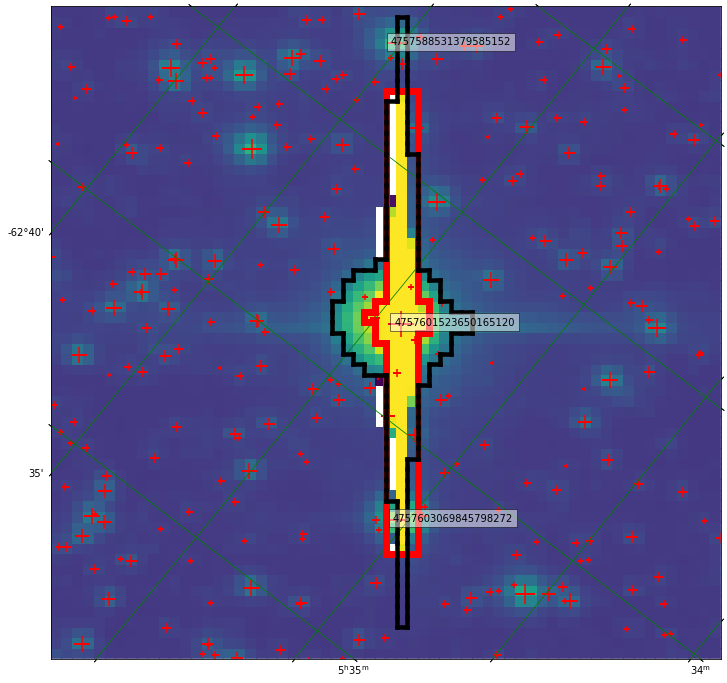

In [64]:
fig = plt.figure(figsize=(12,12))
fig.add_subplot(111, projection=wcs)

#plt.figure(figsize=(12,12))
plt.pcolormesh(np.log(hdul.data))

#filtered=border(tpf_s1.pipeline_mask*1)
#for x in range(len(filtered)):
#    plt.plot(np.asarray(filtered[x][0])+19,np.asarray(filtered[x][1])+1,c='red', linewidth=7)
 

    
    
spocaper=np.genfromtxt('betador_s0001_spocaperture.txt')
spocaper=np.asarray(spocaper)
spocaper=(spocaper == 75)*1
filtered_spoc=border(spocaper)
for x in range(len(filtered_tasoc)):
    plt.plot(np.asarray(filtered_spoc[x][0])+19,np.asarray(filtered_spoc[x][1])+1,c='red', linewidth=7)



customaper=np.genfromtxt('betador_s0001_customaperture.txt')
customaper=np.asarray(customaper)
customaper=(customaper == 3)*1
filtered_custom=border(customaper)
for x in range(len(filtered_custom)):
    plt.plot(np.asarray(filtered_custom[x][0])+19,np.asarray(filtered_custom[x][1])+1,c='black', linewidth=4.5)
        
     
    
#filtered_ourap=border(ourap)
#for x in range(len(filtered_ourap)):
#    plt.plot(np.asarray(filtered_ourap[x][0])+19,np.asarray(filtered_ourap[x][1])+1,c='palegreen', linewidth=3)
    
ax = fig.gca()
#for x in range(len(extractedgaiadata[0])):
#    ax.scatter(extractedgaiadata[1][x], extractedgaiadata[2][x],transform=ax.get_transform('world'),marker='+',c='red',s=sizearray[x])
#    if brightness[x]<12:
#        ax.text(extractedgaiadata[1][x], extractedgaiadata[2][x],extractedgaiadata[0][x],transform=ax.get_transform('world'),bbox=dict(facecolor='white', alpha=0.5))

#for x in range(len(extractedgaiadata[0])):
#    ax.scatter(extractedgaiadata[1][x]-0.5*21/3600, extractedgaiadata[2][x],transform=ax.get_transform('world'),marker='+',c='white',s=sizearray[x])        

for x in range(len(extractedgaiadata[0])):
    ax.scatter(extractedgaiadata[1][x]-2*0.5*21/3600, extractedgaiadata[2][x]+2*0.2*21/3600,transform=ax.get_transform('world'),marker='+',c='red',s=sizearray[x])        
    if extractedgaiadata[0][x] in [4757603069845798272,4757601523650165120,4757588531379585152]:
        ax.text(extractedgaiadata[1][x], extractedgaiadata[2][x],extractedgaiadata[0][x],transform=ax.get_transform('world'),bbox=dict(facecolor='white', alpha=0.5))

ax.set_xlim([0, 62])
ax.set_ylim([0, 62])
    
ax.coords.grid(True, color='green', ls='solid')

/home/szabopal/.local/lib/python3.5/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/home/szabopal/.local/lib/python3.5/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


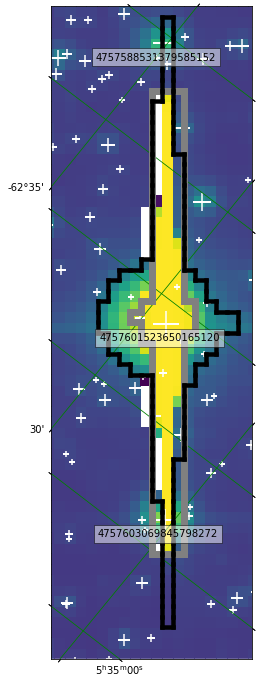

In [180]:
fig = plt.figure(figsize=(12*hanyadreszeakepneklatszon,12))
fig.add_subplot(111, projection=wcs)

#plt.figure(figsize=(12,12))
plt.pcolormesh(np.log(hdul.data))

#filtered=border(tpf_s1.pipeline_mask*1)
#for x in range(len(filtered)):
#    plt.plot(np.asarray(filtered[x][0])+19,np.asarray(filtered[x][1])+1,c='red', linewidth=7)
 

    
    
spocaper=np.genfromtxt('betador_s0001_spocaperture.txt')
spocaper=np.asarray(spocaper)
spocaper=(spocaper == 75)*1
filtered_spoc=border(spocaper)
for x in range(len(filtered_tasoc)):
    plt.plot(np.asarray(filtered_spoc[x][0])+19,np.asarray(filtered_spoc[x][1])+1,c='grey', linewidth=7)



customaper=np.genfromtxt('betador_s0001_customaperture.txt')
customaper=np.asarray(customaper)
customaper=(customaper == 3)*1
filtered_custom=border(customaper)
for x in range(len(filtered_custom)):
    plt.plot(np.asarray(filtered_custom[x][0])+19,np.asarray(filtered_custom[x][1])+1,c='black', linewidth=4.5)
        
     
    
#filtered_ourap=border(ourap)
#for x in range(len(filtered_ourap)):
#    plt.plot(np.asarray(filtered_ourap[x][0])+19,np.asarray(filtered_ourap[x][1])+1,c='palegreen', linewidth=3)
    
ax = fig.gca()
#for x in range(len(extractedgaiadata[0])):
#    ax.scatter(extractedgaiadata[1][x], extractedgaiadata[2][x],transform=ax.get_transform('world'),marker='+',c='red',s=sizearray[x])
#    if brightness[x]<12:
#        ax.text(extractedgaiadata[1][x], extractedgaiadata[2][x],extractedgaiadata[0][x],transform=ax.get_transform('world'),bbox=dict(facecolor='white', alpha=0.5))

#for x in range(len(extractedgaiadata[0])):
#    ax.scatter(extractedgaiadata[1][x]-0.5*21/3600, extractedgaiadata[2][x],transform=ax.get_transform('world'),marker='+',c='white',s=sizearray[x])        

for x in range(len(extractedgaiadata[0])):
    ax.scatter(extractedgaiadata[1][x]-2*0.5*21/3600, extractedgaiadata[2][x]+2*0.2*21/3600,transform=ax.get_transform('world'),marker='+',c='white',s=sizearray[x])        
    if extractedgaiadata[0][x] in [4757603069845798272,4757601523650165120,4757588531379585152]:
        ax.text(extractedgaiadata[1][x]+10*21/3600, extractedgaiadata[2][x]-3.5*21/3600,extractedgaiadata[0][x],transform=ax.get_transform('world'),bbox=dict(facecolor='white', alpha=0.5))

hanyadreszeakepneklatszon=0.3
ax.set_xlim([62*(1-hanyadreszeakepneklatszon)/2, 62*((1-hanyadreszeakepneklatszon)/2+hanyadreszeakepneklatszon)])
ax.set_ylim([0, 62])
    
ax.coords.grid(True, color='green', ls='solid')

In [82]:
allflux=[]
for each in tpf_s1.flux:
    allflux.append(sum(sum(each)))

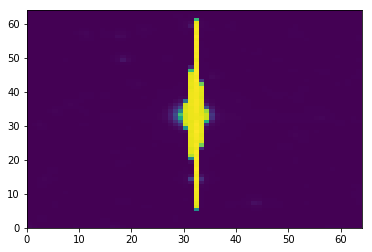

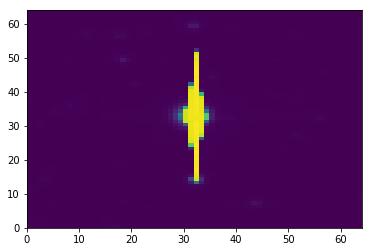

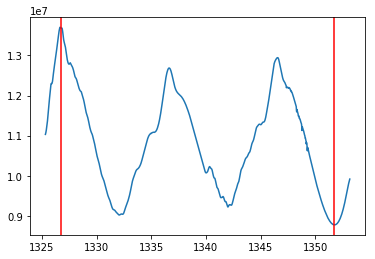

In [84]:
times=[]
for index, each in enumerate(tpf_s1.flux):
    if index==70 or index==1200:
        plt.figure()
        plt.pcolormesh(each)
        times.append(tpf_s1.time[index])
        plt.show()
        
plt.plot(tpf_s1.time,allflux)
for each in times:
    plt.axvline(x=each,c='r')

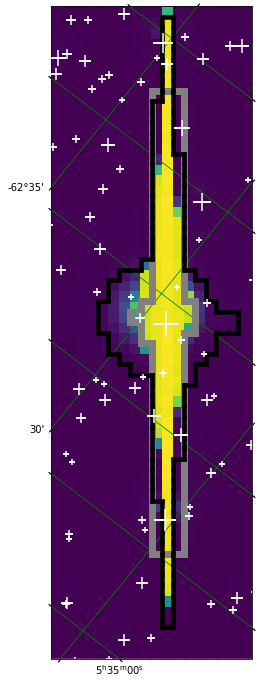

In [93]:
fig = plt.figure(figsize=(12*hanyadreszeakepneklatszon,12))
fig.add_subplot(111, projection=wcs)

#plt.figure(figsize=(12,12))
plt.pcolormesh(tpf_s1.flux[70])

#filtered=border(tpf_s1.pipeline_mask*1)
#for x in range(len(filtered)):
#    plt.plot(np.asarray(filtered[x][0])+19,np.asarray(filtered[x][1])+1,c='red', linewidth=7)
 

    
    
spocaper=np.genfromtxt('betador_s0001_spocaperture.txt')
spocaper=np.asarray(spocaper)
spocaper=(spocaper == 75)*1
filtered_spoc=border(spocaper)
for x in range(len(filtered_tasoc)):
    plt.plot(np.asarray(filtered_spoc[x][0])+19,np.asarray(filtered_spoc[x][1])+1,c='grey', linewidth=7)



customaper=np.genfromtxt('betador_s0001_customaperture.txt')
customaper=np.asarray(customaper)
customaper=(customaper == 3)*1
filtered_custom=border(customaper)
for x in range(len(filtered_custom)):
    plt.plot(np.asarray(filtered_custom[x][0])+19,np.asarray(filtered_custom[x][1])+1,c='black', linewidth=4.5)
        
     
    
#filtered_ourap=border(ourap)
#for x in range(len(filtered_ourap)):
#    plt.plot(np.asarray(filtered_ourap[x][0])+19,np.asarray(filtered_ourap[x][1])+1,c='palegreen', linewidth=3)
    
ax = fig.gca()
#for x in range(len(extractedgaiadata[0])):
#    ax.scatter(extractedgaiadata[1][x], extractedgaiadata[2][x],transform=ax.get_transform('world'),marker='+',c='red',s=sizearray[x])
#    if brightness[x]<12:
#        ax.text(extractedgaiadata[1][x], extractedgaiadata[2][x],extractedgaiadata[0][x],transform=ax.get_transform('world'),bbox=dict(facecolor='white', alpha=0.5))

#for x in range(len(extractedgaiadata[0])):
#    ax.scatter(extractedgaiadata[1][x]-0.5*21/3600, extractedgaiadata[2][x],transform=ax.get_transform('world'),marker='+',c='white',s=sizearray[x])        

for x in range(len(extractedgaiadata[0])):
    ax.scatter(extractedgaiadata[1][x]-2*0.5*21/3600, extractedgaiadata[2][x]+2*0.2*21/3600,transform=ax.get_transform('world'),marker='+',c='white',s=sizearray[x],zorder=10)        
#    if extractedgaiadata[0][x] in [4757603069845798272,4757601523650165120,4757588531379585152]:
#        ax.text(extractedgaiadata[1][x]+10*21/3600, extractedgaiadata[2][x]-3.5*21/3600,extractedgaiadata[0][x],transform=ax.get_transform('world'),bbox=dict(facecolor='white', alpha=0.5))

hanyadreszeakepneklatszon=0.3
ax.set_xlim([62*(1-hanyadreszeakepneklatszon)/2, 62*((1-hanyadreszeakepneklatszon)/2+hanyadreszeakepneklatszon)])
ax.set_ylim([0, 62])
    
ax.coords.grid(True, color='green', ls='solid')

/home/szabopal/.local/lib/python3.5/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/home/szabopal/.local/lib/python3.5/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


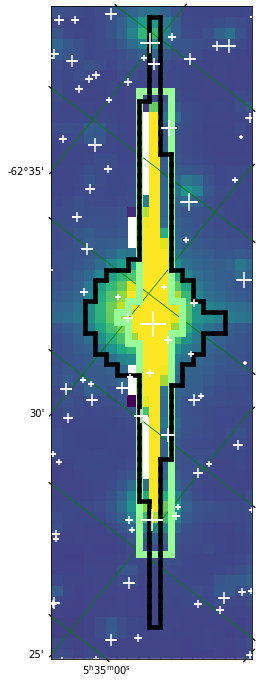

In [118]:
fig = plt.figure(figsize=(12*hanyadreszeakepneklatszon,12))
fig.add_subplot(111, projection=wcs)

#plt.figure(figsize=(12,12))
plt.pcolormesh(np.log(tpf_s1.flux[1200]))

#filtered=border(tpf_s1.pipeline_mask*1)
#for x in range(len(filtered)):
#    plt.plot(np.asarray(filtered[x][0])+19,np.asarray(filtered[x][1])+1,c='red', linewidth=7)
 

    
    
spocaper=np.genfromtxt('betador_s0001_spocaperture.txt')
spocaper=np.asarray(spocaper)
spocaper=(spocaper == 75)*1
filtered_spoc=border(spocaper)
for x in range(len(filtered_tasoc)):
    plt.plot(np.asarray(filtered_spoc[x][0])+19,np.asarray(filtered_spoc[x][1])+1,c='palegreen', linewidth=7)



customaper=np.genfromtxt('betador_s0001_customaperture.txt')
customaper=np.asarray(customaper)
customaper=(customaper == 3)*1
filtered_custom=border(customaper)
for x in range(len(filtered_custom)):
    plt.plot(np.asarray(filtered_custom[x][0])+19,np.asarray(filtered_custom[x][1])+1,c='black', linewidth=4.5)
        
     
    
#filtered_ourap=border(ourap)
#for x in range(len(filtered_ourap)):
#    plt.plot(np.asarray(filtered_ourap[x][0])+19,np.asarray(filtered_ourap[x][1])+1,c='palegreen', linewidth=3)
    
ax = fig.gca()
#for x in range(len(extractedgaiadata[0])):
#    ax.scatter(extractedgaiadata[1][x], extractedgaiadata[2][x],transform=ax.get_transform('world'),marker='+',c='red',s=sizearray[x])
#    if brightness[x]<12:
#        ax.text(extractedgaiadata[1][x], extractedgaiadata[2][x],extractedgaiadata[0][x],transform=ax.get_transform('world'),bbox=dict(facecolor='white', alpha=0.5))

#for x in range(len(extractedgaiadata[0])):
#    ax.scatter(extractedgaiadata[1][x]-0.5*21/3600, extractedgaiadata[2][x],transform=ax.get_transform('world'),marker='+',c='white',s=sizearray[x])        

for x in range(len(extractedgaiadata[0])):
    ax.scatter(extractedgaiadata[1][x]-2*0.5*21/3600, extractedgaiadata[2][x]+2*0.2*21/3600,transform=ax.get_transform('world'),marker='+',c='white',s=sizearray[x],zorder=10)       
#    if extractedgaiadata[0][x] in [4757603069845798272,4757601523650165120,4757588531379585152]:
#        ax.text(extractedgaiadata[1][x]+10*21/3600, extractedgaiadata[2][x]-3.5*21/3600,extractedgaiadata[0][x],transform=ax.get_transform('world'),bbox=dict(facecolor='white', alpha=0.5))

hanyadreszeakepneklatszon=0.3
shift=1.2
ax.set_xlim([62*(1-hanyadreszeakepneklatszon)/2+shift, 62*((1-hanyadreszeakepneklatszon)/2+hanyadreszeakepneklatszon)+shift])
ax.set_ylim([0, 62])
    
ax.coords.grid(True, color='green', ls='solid')

/home/szabopal/.local/lib/python3.5/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/home/szabopal/.local/lib/python3.5/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


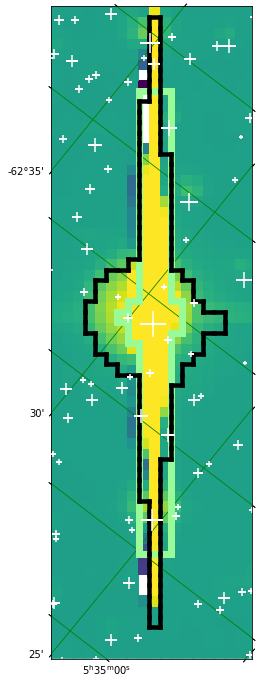

In [119]:
fig = plt.figure(figsize=(12*hanyadreszeakepneklatszon,12))
fig.add_subplot(111, projection=wcs)

#plt.figure(figsize=(12,12))
plt.pcolormesh(np.log(tpf_s1.flux[70]))

#filtered=border(tpf_s1.pipeline_mask*1)
#for x in range(len(filtered)):
#    plt.plot(np.asarray(filtered[x][0])+19,np.asarray(filtered[x][1])+1,c='red', linewidth=7)
 

    
    
spocaper=np.genfromtxt('betador_s0001_spocaperture.txt')
spocaper=np.asarray(spocaper)
spocaper=(spocaper == 75)*1
filtered_spoc=border(spocaper)
for x in range(len(filtered_tasoc)):
    plt.plot(np.asarray(filtered_spoc[x][0])+19,np.asarray(filtered_spoc[x][1])+1,c='palegreen', linewidth=7)



customaper=np.genfromtxt('betador_s0001_customaperture.txt')
customaper=np.asarray(customaper)
customaper=(customaper == 3)*1
filtered_custom=border(customaper)
for x in range(len(filtered_custom)):
    plt.plot(np.asarray(filtered_custom[x][0])+19,np.asarray(filtered_custom[x][1])+1,c='black', linewidth=4.5)
        
     
    
#filtered_ourap=border(ourap)
#for x in range(len(filtered_ourap)):
#    plt.plot(np.asarray(filtered_ourap[x][0])+19,np.asarray(filtered_ourap[x][1])+1,c='palegreen', linewidth=3)
    
ax = fig.gca()
#for x in range(len(extractedgaiadata[0])):
#    ax.scatter(extractedgaiadata[1][x], extractedgaiadata[2][x],transform=ax.get_transform('world'),marker='+',c='red',s=sizearray[x])
#    if brightness[x]<12:
#        ax.text(extractedgaiadata[1][x], extractedgaiadata[2][x],extractedgaiadata[0][x],transform=ax.get_transform('world'),bbox=dict(facecolor='white', alpha=0.5))

#for x in range(len(extractedgaiadata[0])):
#    ax.scatter(extractedgaiadata[1][x]-0.5*21/3600, extractedgaiadata[2][x],transform=ax.get_transform('world'),marker='+',c='white',s=sizearray[x])        

for x in range(len(extractedgaiadata[0])):
    ax.scatter(extractedgaiadata[1][x]-2*0.5*21/3600, extractedgaiadata[2][x]+2*0.2*21/3600,transform=ax.get_transform('world'),marker='+',c='white',s=sizearray[x],zorder=10)       
#    if extractedgaiadata[0][x] in [4757603069845798272,4757601523650165120,4757588531379585152]:
#        ax.text(extractedgaiadata[1][x]+10*21/3600, extractedgaiadata[2][x]-3.5*21/3600,extractedgaiadata[0][x],transform=ax.get_transform('world'),bbox=dict(facecolor='white', alpha=0.5))

hanyadreszeakepneklatszon=0.3
shift=1.2
ax.set_xlim([62*(1-hanyadreszeakepneklatszon)/2+shift, 62*((1-hanyadreszeakepneklatszon)/2+hanyadreszeakepneklatszon)+shift])
ax.set_ylim([0, 62])
    
ax.coords.grid(True, color='green', ls='solid')

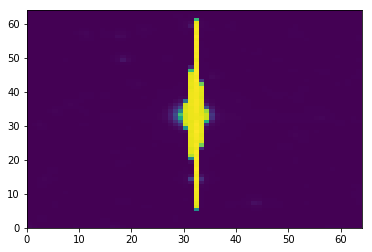

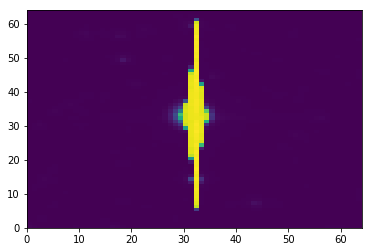

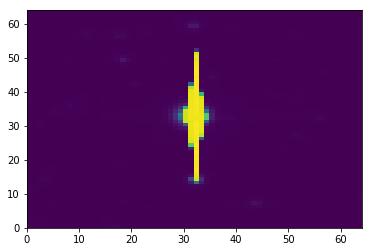

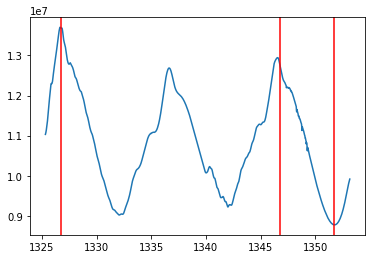

In [136]:
times=[]
for index, each in enumerate(tpf_s1.flux):
    if index==70 or index==1200 or index==964:
        plt.figure()
        plt.pcolormesh(each)
        times.append(tpf_s1.time[index])
        plt.show()
        
plt.plot(tpf_s1.time,allflux)
for each in times:
    plt.axvline(x=each,c='r')

/home/szabopal/.local/lib/python3.5/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
/home/szabopal/.local/lib/python3.5/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys


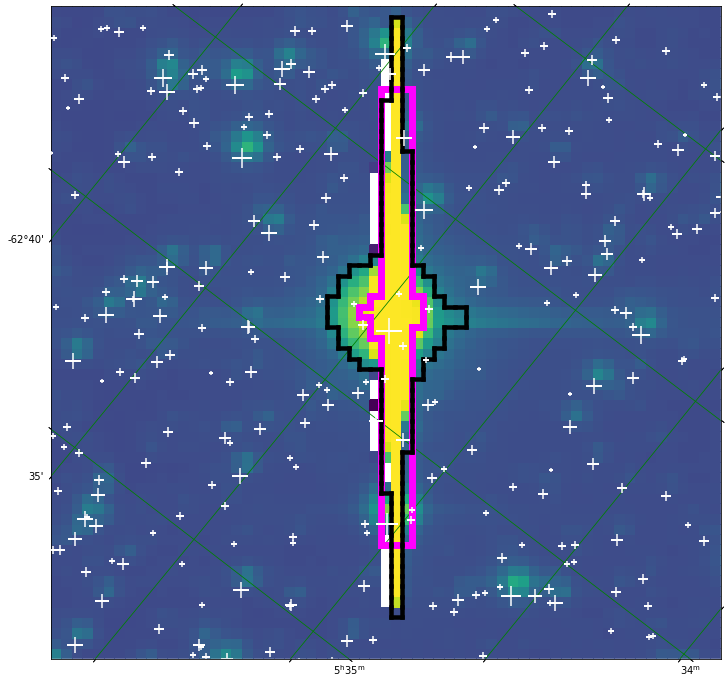

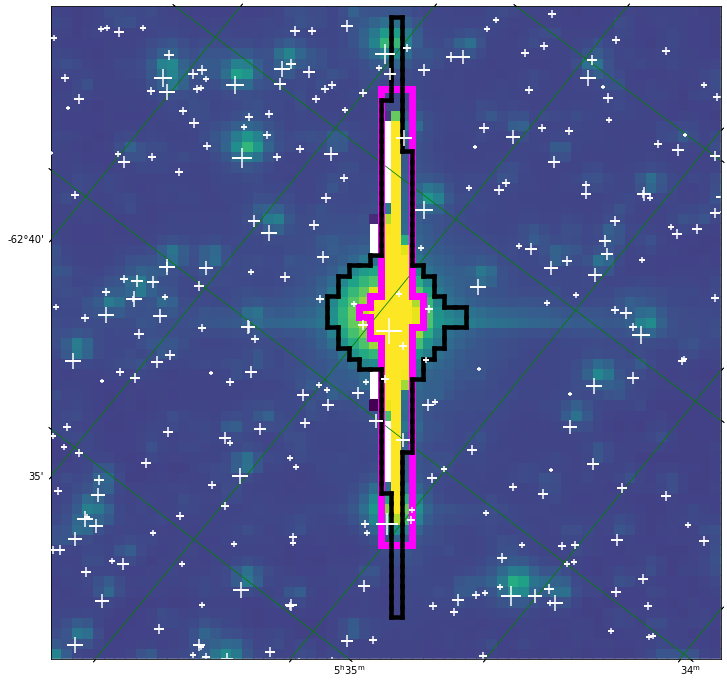

In [175]:
for eachindex in [954,1200]:
#    fig = plt.figure(figsize=(12*hanyadreszeakepneklatszon,12))
    fig = plt.figure(figsize=(12,12))
    fig.add_subplot(111, projection=wcs)

    #plt.figure(figsize=(12,12))
    plt.pcolormesh(np.log(tpf_s1.flux[eachindex]))

    #filtered=border(tpf_s1.pipeline_mask*1)
    #for x in range(len(filtered)):
    #    plt.plot(np.asarray(filtered[x][0])+19,np.asarray(filtered[x][1])+1,c='red', linewidth=7)




    spocaper=np.genfromtxt('betador_s0001_spocaperture_shiftedup.txt')
    spocaper=np.asarray(spocaper)
    spocaper=(spocaper == 75)*1
    filtered_spoc=border(spocaper)
    for x in range(len(filtered_tasoc)):
        plt.plot(np.asarray(filtered_spoc[x][0])+19,np.asarray(filtered_spoc[x][1])+1,c='magenta', linewidth=7)



    customaper=np.genfromtxt('betador_s0001_customaperture_shiftedup.txt')
    customaper=np.asarray(customaper)
    customaper=(customaper == 3)*1
    filtered_custom=border(customaper)
    for x in range(len(filtered_custom)):
        plt.plot(np.asarray(filtered_custom[x][0])+19,np.asarray(filtered_custom[x][1])+1,c='black', linewidth=4.5)



    #filtered_ourap=border(ourap)
    #for x in range(len(filtered_ourap)):
    #    plt.plot(np.asarray(filtered_ourap[x][0])+19,np.asarray(filtered_ourap[x][1])+1,c='palegreen', linewidth=3)

    ax = fig.gca()
    #for x in range(len(extractedgaiadata[0])):
    #    ax.scatter(extractedgaiadata[1][x], extractedgaiadata[2][x],transform=ax.get_transform('world'),marker='+',c='red',s=sizearray[x])
    #    if brightness[x]<12:
    #        ax.text(extractedgaiadata[1][x], extractedgaiadata[2][x],extractedgaiadata[0][x],transform=ax.get_transform('world'),bbox=dict(facecolor='white', alpha=0.5))

    #for x in range(len(extractedgaiadata[0])):
    #    ax.scatter(extractedgaiadata[1][x]-0.5*21/3600, extractedgaiadata[2][x],transform=ax.get_transform('world'),marker='+',c='white',s=sizearray[x])        

    for x in range(len(extractedgaiadata[0])):
#        ax.scatter(extractedgaiadata[1][x]-2*0.5*21/3600, extractedgaiadata[2][x]+2*0.2*21/3600,transform=ax.get_transform('world'),marker='+',c='white',s=sizearray[x],zorder=10)       
        ax.scatter(extractedgaiadata[1][x], extractedgaiadata[2][x],transform=ax.get_transform('world'),marker='+',c='white',s=sizearray[x],zorder=10)       
    #    if extractedgaiadata[0][x] in [4757603069845798272,4757601523650165120,4757588531379585152]:
    #        ax.text(extractedgaiadata[1][x]+10*21/3600, extractedgaiadata[2][x]-3.5*21/3600,extractedgaiadata[0][x],transform=ax.get_transform('world'),bbox=dict(facecolor='white', alpha=0.5))

    hanyadreszeakepneklatszon=0.3
    shift=1.2
    #ax.set_xlim([62*(1-hanyadreszeakepneklatszon)/2+shift, 62*((1-hanyadreszeakepneklatszon)/2+hanyadreszeakepneklatszon)+shift])
    ax.set_xlim([0, 63])
    ax.set_ylim([0, 63])

    ax.coords.grid(True, color='green', ls='solid')

In [137]:
customaper=np.genfromtxt('betador_s0001_customaperture.txt')
customaper=np.asarray(customaper)
customaper=(customaper == 3)*1

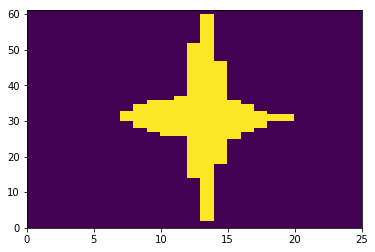

In [142]:
plt.pcolormesh(customaper)

In [152]:
shiftedupone=np.zeros(customaper.shape)


In [154]:
print(customaper)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
